In [ ]:
!kaggle datasets download -d francismon/curated-colon-dataset-for-deep-learning

Dataset URL: https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning
License(s): unknown
100% 1.40G/1.41G [00:51<00:00, 25.2MB/s]
100% 1.41G/1.41G [00:51<00:00, 29.1MB/s]


In [ ]:
!unzip "/content/curated-colon-dataset-for-deep-learning.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/0_normal/train_normal_ (28).jpg  
  inflating: train/0_normal/train_normal_ (280).jpg  
  inflating: train/0_normal/train_normal_ (281).jpg  
  inflating: train/0_normal/train_normal_ (282).jpg  
  inflating: train/0_normal/train_normal_ (283).jpg  
  inflating: train/0_normal/train_normal_ (284).jpg  
  inflating: train/0_normal/train_normal_ (285).jpg  
  inflating: train/0_normal/train_normal_ (286).jpg  
  inflating: train/0_normal/train_normal_ (287).jpg  
  inflating: train/0_normal/train_normal_ (288).jpg  
  inflating: train/0_normal/train_normal_ (289).jpg  
  inflating: train/0_normal/train_normal_ (29).jpg  
  inflating: train/0_normal/train_normal_ (290).jpg  
  inflating: train/0_normal/train_normal_ (291).jpg  
  inflating: train/0_normal/train_normal_ (292).jpg  
  inflating: train/0_normal/train_normal_ (293).jpg  
  inflating: train/0_normal/train_normal_ (294).jpg  
  inflating: train/0_normal/train

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # Optional: for progress bar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define paths
train_path = "/content/train"
test_path = "/content/test"
valid_path = "/content/val"

# Define ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    preprocessing_function=preprocess_input  # VGG16 preprocessing (mean subtraction)
)

# For testing and validation, only rescaling is applied
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Function to preprocess and save images
def preprocess_and_save(generator, target_path):
    if not os.path.exists(target_path):
        os.makedirs(target_path)

    num_batches = len(generator)
    for i in tqdm(range(num_batches)):
        data_batch, labels_batch = generator[i]
        processed_images = []
        for img in data_batch:
            # Example preprocessing steps
            processed_img = preprocess_image(img)
            processed_images.append(processed_img)

        # Save processed images
        for idx, processed_img in enumerate(processed_images):
            filename = os.path.join(target_path, f'image_{i * generator.batch_size + idx}.jpg')
            cv2.imwrite(filename, processed_img)

def preprocess_image(img):
    # Denoising with Gaussian blur
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Ensure the image has the correct data type (uint8)
    if gray.dtype != np.uint8:
        gray = gray.astype(np.uint8)

    # Edge detection with Canny edge detector
    edges = cv2.Canny(gray, 100, 200)

    # Image cropping (adjust cropping dimensions as needed)
    crop_img = img[50:150, 50:150]

    return crop_img  # Return processed image

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Preprocess and save images for train, test, and val
preprocess_and_save(train_generator, '/content/processed/train')
preprocess_and_save(test_generator, '/content/processed/test')
preprocess_and_save(valid_generator, '/content/processed/val')


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(include_top = False , input_shape = (224,224,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
output = Dense(4,activation = "softmax")(x)

In [ ]:
vgg16 = Model(vgg.input , output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
history = vgg16.fit(train_generator , validation_data= test_generator,epochs = 5)

Epoch 1/5
160/160 [==============================] - 80s 450ms/step - loss: 0.2660 - accuracy: 0.9069 - val_loss: 0.8121 - val_accuracy: 0.7425
Epoch 2/5
160/160 [==============================] - 74s 462ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.4839 - val_accuracy: 0.8225
Epoch 3/5
160/160 [==============================] - 70s 437ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 1.2697 - val_accuracy: 0.7075
Epoch 4/5
160/160 [==============================] - 73s 459ms/step - loss: 0.0410 - accuracy: 0.9844 - val_loss: 0.8044 - val_accuracy: 0.7812
Epoch 5/5
160/160 [==============================] - 70s 439ms/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.6487 - val_accuracy: 0.8012


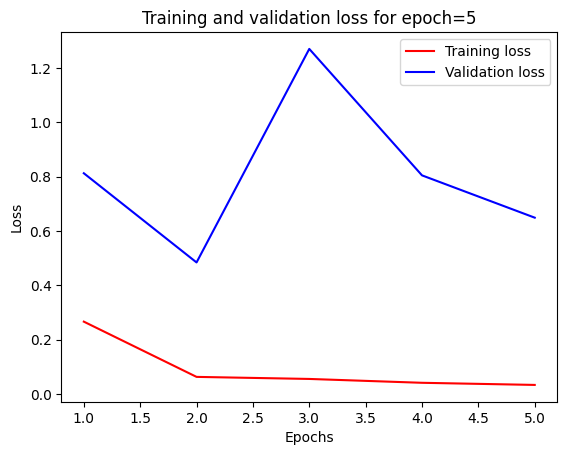

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'r', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
history2 = vgg16.fit(train_generator , validation_data= test_generator,epochs = 20)

training_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']



Epoch 1/20
 82/160 [==============>...............] - ETA: 31s - loss: 0.0234 - accuracy: 0.9921

KeyboardInterrupt: 

In [ ]:
epochs2 = range(1, len(training_loss2) + 1)

plt.plot(epochs2, training_loss2, 'r', label='Training loss')
plt.plot(epochs2, validation_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [ ]:
index=['normal','ulcerative_colitis','polyps','esophagitis']

In [ ]:
def predict_classification(Img_path):
  img=load_img(Img_path,target_size=(224,224))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  img_data.shape
  output=np.argmax(vgg16.predict(img_data), axis=1)
  result = index[output[0]]
  return result


In [ ]:
print(predict_classification('/content/val/3_esophagitis/val_esophagitis_ (210).jpg'))

1/1 [==============================] - 1s 1s/step
polyps


# **RESNET MODEL**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
resnet50 = ResNet50(include_top = False , input_shape = (224,224,3))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet50.layers:
  print(layer)

In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
x1 = Flatten()(resnet50.output)

In [ ]:
output = Dense(4,activation = "softmax")(x1)

In [ ]:
resnet = Model(resnet50.input , output)

In [ ]:
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
resnet.compile(loss = "categorical_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [ ]:
history3 = resnet.fit(train_generator , validation_data = test_generator , epochs = 5)

Epoch 1/5
160/160 [==============================] - 76s 435ms/step - loss: 1.7653 - accuracy: 0.5609 - val_loss: 1.3760 - val_accuracy: 0.5512
Epoch 2/5
160/160 [==============================] - 71s 441ms/step - loss: 0.7664 - accuracy: 0.7000 - val_loss: 1.2260 - val_accuracy: 0.6475
Epoch 3/5
160/160 [==============================] - 69s 429ms/step - loss: 0.5901 - accuracy: 0.7797 - val_loss: 2.1279 - val_accuracy: 0.5362
Epoch 4/5
160/160 [==============================] - 69s 430ms/step - loss: 0.5519 - accuracy: 0.8037 - val_loss: 0.8280 - val_accuracy: 0.7312
Epoch 5/5
160/160 [==============================] - 71s 441ms/step - loss: 0.4989 - accuracy: 0.8075 - val_loss: 0.8316 - val_accuracy: 0.7138


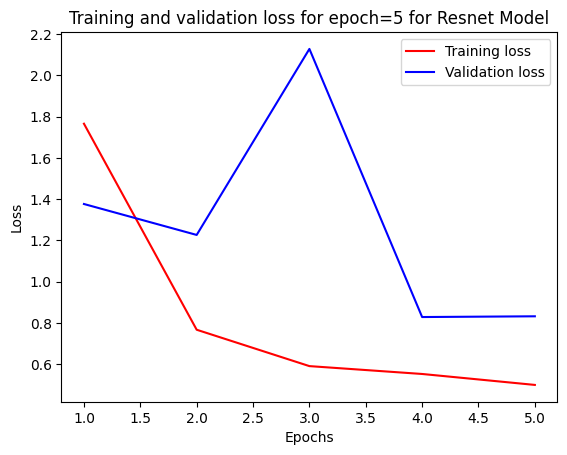

In [ ]:
training_loss3 = history3.history['loss']
validation_loss3 = history3.history['val_loss']

epochs3 = range(1, len(training_loss3) + 1)

plt.plot(epochs3, training_loss3, 'r', label='Training loss')
plt.plot(epochs3, validation_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5 for Resnet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Inception**

In [ ]:
train = train_datagen.flow_from_directory(train_path , target_size = (299,299), batch_size = 20)
test = test_datagen.flow_from_directory(test_path , target_size = (299,299), batch_size = 20)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
inception_v3 = InceptionV3(include_top=False , input_shape = (299,299,3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception_v3.layers:
  print(layer)

In [ ]:
for layer in inception_v3.layers:
  layer.trainable = False

In [ ]:
x3 = Flatten()(inception_v3.output)

In [ ]:
output3 = Dense(4,activation = "softmax")(x3)

In [ ]:
inception = Model(inception_v3.input, output3)

In [ ]:
inception.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

In [ ]:
inception.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input


train_path = "/content/train"
test_path = "/content/test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=20,
    class_mode='categorical'
)


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
history4 = inception.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/5
160/160 [==============================] - 102s 637ms/step - loss: 1.0958 - accuracy: 0.7366 - val_loss: 36.7572 - val_accuracy: 0.2488
Epoch 2/5
160/160 [==============================] - 97s 609ms/step - loss: 0.4149 - accuracy: 0.8516 - val_loss: 41.2480 - val_accuracy: 0.2600
Epoch 3/5
160/160 [==============================] - 100s 623ms/step - loss: 0.3052 - accuracy: 0.8897 - val_loss: 55.0483 - val_accuracy: 0.2562
Epoch 4/5
160/160 [==============================] - 96s 603ms/step - loss: 0.3322 - accuracy: 0.8878 - val_loss: 57.8646 - val_accuracy: 0.2575
Epoch 5/5
160/160 [==============================] - 98s 612ms/step - loss: 0.2755 - accuracy: 0.9109 - val_loss: 67.4029 - val_accuracy: 0.2625


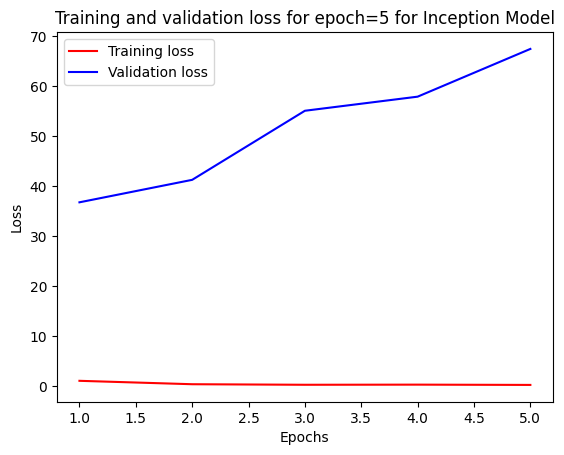

In [ ]:
training_loss4 = history4.history['loss']
validation_loss4 = history4.history['val_loss']

epochs4 = range(1, len(training_loss4) + 1)

plt.plot(epochs4, training_loss4, 'r', label='Training loss')
plt.plot(epochs4, validation_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss for epoch=5 for Inception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

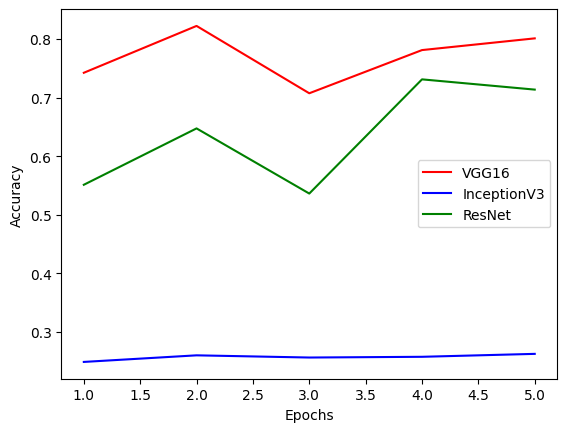

In [ ]:
accuracy_vgg = history.history["val_accuracy"]
accuracy_resnet = history3.history["val_accuracy"]
accuracy_inception = history4.history["val_accuracy"]
epochs5 = range(1,6)
plt.plot(epochs5,accuracy_vgg,'r',label = "VGG16")
plt.plot(epochs5,accuracy_inception,'b',label = "InceptionV3")
plt.plot(epochs5,accuracy_resnet,'g',label = "ResNet")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
vgg16.save("vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
